In [1]:
! wget https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz


--2025-04-23 00:57:43--  https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/myleott/mnist_png/master/mnist_png.tar.gz [following]
--2025-04-23 00:57:44--  https://raw.githubusercontent.com/myleott/mnist_png/master/mnist_png.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15683414 (15M) [application/octet-stream]
Saving to: ‘mnist_png.tar.gz’

mnist_png.tar.gz    100%[===================>]  14.96M  32.4MB/s    in 0.5s    

2025-04-23 00:57:47 (32.4 MB/s) - ‘mnist_png.tar.gz’ saved [15683414/15683414]



In [2]:
! tar zxf mnist_png.tar.gz

In [6]:
! ls
%cd mnist_png/

mnist_png  mnist_png.tar.gz  sample_data
/content/mnist_png


In [7]:
%ls
%pwd

testing/  training/


'/content/mnist_png'

In [11]:
! ls -l testing

total 268
drwxr-x--- 2 1000 1000 28672 Dec 11  2015 0
drwxr-x--- 2 1000 1000 36864 Dec 11  2015 1
drwxr-x--- 2 1000 1000 28672 Dec 11  2015 2
drwxr-x--- 2 1000 1000 24576 Dec 11  2015 3
drwxr-x--- 2 1000 1000 24576 Dec 11  2015 4
drwxr-x--- 2 1000 1000 20480 Dec 11  2015 5
drwxr-x--- 2 1000 1000 24576 Dec 11  2015 6
drwxr-x--- 2 1000 1000 32768 Dec 11  2015 7
drwxr-x--- 2 1000 1000 24576 Dec 11  2015 8
drwxr-x--- 2 1000 1000 28672 Dec 11  2015 9


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [13]:
# Generator for training dataset
train_generator = my_generator.flow_from_directory( './training/', target_size=(150, 150), batch_size=4, class_mode='categorical')
# Generator for validation dataset
valid_generator = my_generator.flow_from_directory( './testing/', target_size=(150, 150), batch_size=4, class_mode='categorical')
# We may need to create another generator for the test dataset
# ??

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [14]:
import matplotlib.pyplot as plt

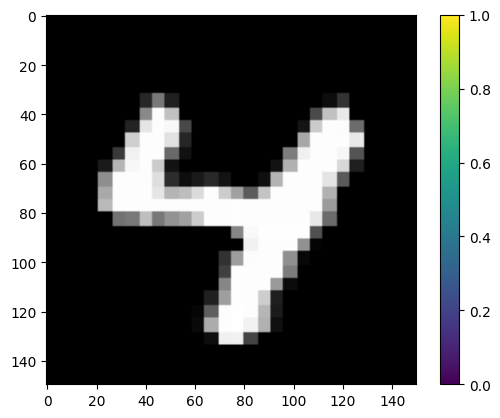

(150, 150, 3)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [15]:
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [17]:
model = Sequential()
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 10, activation = 'relu' ) )
model.add( Dense( 10, activation = 'softmax' ) )
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 4)    │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 85264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       852,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853,788 (3.26 MB)

 Trainable params: 853,788 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model.fit( train_generator, validation_data = valid_generator, epochs = 5, batch_size = 64 )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.8561 - loss: 0.4792 - val_accuracy: 0.9656 - val_loss: 0.1148
Epoch 2/5
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9729 - loss: 0.0915 - val_accuracy: 0.9752 - val_loss: 0.0840
Epoch 3/5
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9840 - loss: 0.0506 - val_accuracy: 0.9731 - val_loss: 0.0874
Epoch 4/5
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9699 - val_loss: 0.1072
Epoch 5/5
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9730 - val_loss: 0.1163


In [20]:
history.history

{'accuracy': [0.9243166446685791,
  0.9726166725158691,
  0.9817000031471252,
  0.987333357334137,
  0.991433322429657],
 'loss': [0.2539583146572113,
  0.09178943186998367,
  0.057780519127845764,
  0.039228495210409164,
  0.027211330831050873],
 'val_accuracy': [0.9656000137329102,
  0.9751999974250793,
  0.9731000065803528,
  0.9699000120162964,
  0.9729999899864197],
 'val_loss': [0.11483890563249588,
  0.08403018862009048,
  0.08740758895874023,
  0.10724027454853058,
  0.11626557260751724]}

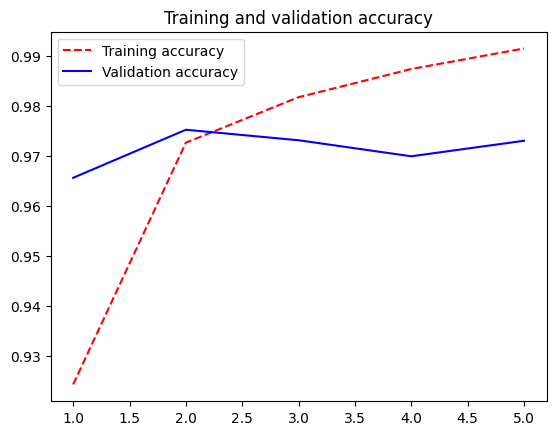

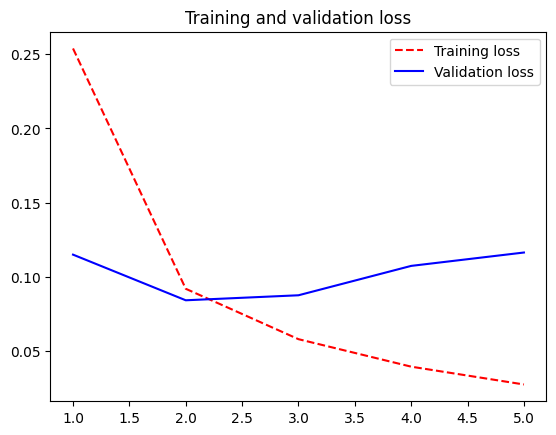

In [21]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()